# Project: Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This is a dataset collected from the popular imdb website on movies that were released from 1960 to 2015. The dataset includes columns like revenue, budget, cast, production companies, popularity, release date, vote count, vote average, etc. The dataset has almost 11000 rows and 21 columns. This project would focus on the revenue column as the dependent variable and explore how other columns (independent variables) affect revenue.

Questions that would be explored are:
> 1. Relationship between budget and revenue.
>
> 2. Relationship between revenue and popularity.
>
> 3. How does the revenue look like when viewed year to year?
>
> 4. What is the average/total revenue generated by each genre?
>
> 5. What is the average revenue generated by directors? Do directors that have produced more movies have a higher average revenue?
>
> 6. Do movies that have longer runtime(number of minutes the movie aired) generate more revenue?
>
> 7. What genres are most popular year to year?
>
> 8. What impact does the company that produces a movie have on the revenue?
>
> 9. Is there any correlation between vote count and revenue?

In [1]:
# import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

In [2]:
# These lines of code makes so that all the rows and columns are displayed

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Load data and inspect the first few rows

df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Check how many rows and columns there are

df.shape

(10866, 21)

In [5]:
# Information about the general structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Observations
A few columns can be dropped because they are not useful in this analysis. 
> Homepage is the website for each unique movie, so it is not needed.
>
> Tagline is not really useful as each movie would have its own tagline.
>
> Overview is a brief introduction to the movie, same as tagline and can be dropped.

The release date column should be converted to a datetime column.

In [6]:
# To get a brief statistical summary of the columns in this dataset

df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,9373,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,8804,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,woman director,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,134,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


## Observations
A few interesting discoveries here:
> Right away, we can see that the 0th to 50th percentile of the budget and revenue columns have 0. It is unlikely that a movie would have zero budget and revenue so these rows are missing values. Seeing as the revenue is the dependent variable in this analysis, these rows are useless and should be dropped.
>
> The runtime column has a movie with a really high value). We need to see what's happening there. Maybe it is a series?

# Data Cleaning

In [7]:
# Check for duplicates

sum(df.duplicated())

1

In [8]:
# drop duplicate row and check for duplicates again

df.drop_duplicates(inplace=True)

sum(df.duplicated())

0

In [9]:
# drop columns that are not useful in this analysis

df.drop(columns=['homepage', 'tagline', 'overview'], inplace=True)

In [10]:
# drop rows that have no revenue. 
df.drop(df[df['revenue'] == 0].index, axis=0, inplace=True)

# Check if it was successful
df[df['revenue'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [11]:
# convert release_date column to datetime dtype

df['release_date'] = pd.to_datetime(df['release_date'])

## Inspecting the runtime column

In [12]:
# Check how many movies has a runtime greater than 210 (Most movies should be below this)

df[df['runtime'] > 210]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2107,43434,tt1321865,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,gun|car bomb|tv mini-series|terrorism|opec,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010,1.800000e+07,8.712790e+05
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705,Action|Drama|War,HBO,2001-09-09,313,8.0,2001,0.000000e+00,1.539360e+08
3110,14073,tt0449994,0.389554,8376800,13000000,Jodhaa Akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,Ashutosh Gowariker,wife husband relationship|emperor|hindu|marria...,213,Action|Adventure|Drama|Foreign|History,UTV Motion Pictures|Ashutosh Gowariker Product...,2008-02-15,48,7.8,2008,8.483911e+06,1.316623e+07
5065,16072,tt0279111,0.469518,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,war|battle|union soldier|confederate soldier|a...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,23,5.8,2003,6.637975e+07,1.531942e+07
7332,10935,tt0080855,0.418950,44000000,3484331,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,montana|showdown|brothel|marshal|dance,219,Action|Drama|History|Western,United Artists,1980-11-19,18,6.0,1980,1.164256e+08,9.219668e+06
9850,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,cairo|arabian|world war i|horse|jerusalem,216,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,1962,1.081267e+08,5.045914e+08
10304,10655,tt0107007,0.467083,0,25000000,Gettysburg,Jeff Daniels|Tom Berenger|Martin Sheen|Sam Ell...,Ronald F. Maxwell,civil war|troops|independence day|army|battle,254,War|Drama|History,TriStar Television|Esparza / Katz Productions,1993-10-08,46,6.4,1993,0.000000e+00,3.773675e+07
10443,8095,tt0056937,0.804533,31115000,57750000,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,ancient rome|historical figure|cleopatra|juliu...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,2063-06-12,68,6.3,1963,2.215444e+08,4.111904e+08


### Discovery
1. The row that made the outlier in the runtime column is actually a one-season series(Google searched the title of the movie). That is why the runtime value is so big.
2. There is also another row that's a series I discovered. The one titled Carlos. The rest seems normal.

In [13]:
# drop rows that are considered series

df.drop(index=[2107, 2722], inplace=True)

## Inspecting the genres, production companies and director columns

The genre, production companies and director columns have several values in each row separated by the sign '|'. In order to effectively visualize the influence of each of these columns in this dataset, each row has to be split appropriately to show each individual value for each of the columns.

A copy of the dataframe has to be created for each column so as not to disrupt analysis using the original dataframe or any other used copy.

To avoid repitition, we'll create a function that does this automatically.

In [14]:
# create the function

def explode(df, column_name):
    '''
    This function separates values in a column where each row in the column is filled with multiple values separated by '|'.
    
    Parameters:
    df: The dataframe.
    column_name: The column where the separation would happen
    '''
    
    # split values in each row into individual values in a list
    df[column_name] = df[column_name].str.split('|')
    
    # separate values in each row into different rows
    df = df.explode(column_name, ignore_index=True)
    
    return df

In [15]:
# Create copy of dataframe for each column that needs to be separated.
df_genre = df.copy()
df_company = df.copy()
df_director = df.copy()
    
# call the function to modify each dataframe as needed
df_genre = explode(df_genre, 'genres')
df_company = explode(df_company, 'production_companies')
df_director = explode(df_director, 'director')

In [16]:
# View the new genre dataframe

df_genre.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [17]:
df_genre.shape

(12657, 18)

In [18]:
# View the new production_company dataframe

df_company.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [19]:
df_company.shape

(12769, 18)

In [20]:
df_director.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df_director.shape

(5286, 18)

<a id='eda'></a>
# Exploratory Data Analysis

## 1. Relationship between Budget and Revenue

In [22]:
# removing rows where budget has no value i.e. budget = 0

df_budget = df[df['budget'] != 0]

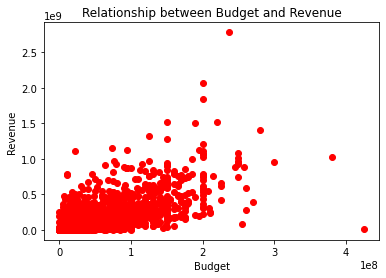

In [23]:
# plot relationship between budget and revenue using scatterplot
plt.scatter(x=df_budget['budget'], y=df_budget['revenue'], c='r');

# Add necessary labels
plt.xlabel('Budget');
plt.ylabel('Revenue');
plt.title('Relationship between Budget and Revenue');

**Observations**
> Although the data was cleaned to remove rows in the budget and revenue columns that were equal to zero, it is clear that some of the rows in both columns contain really small values.

**Findings**
> From the plot, we can see that there is a positive correlation between revenue and budget. 

In [24]:
# Check correlation score between these two columns

df_budget[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.688536
revenue,0.688536,1.000000


In [25]:
# Check correlation value between these two variables
df_budget[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.688536
revenue,0.688536,1.000000


* Budget and Revenue have a correlation coefficient of approximately 0.69

## 2. Relationship between Revenue and Popularity

Text(0.5, 1.0, 'Relationship between Popularity and Revenue')

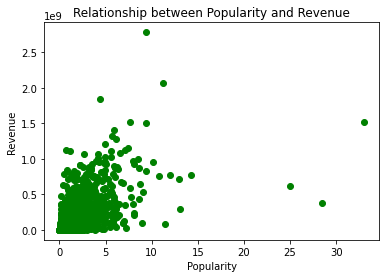

In [26]:
# plot relationship between popularity and revenue using scatterplot
plt.scatter(x=df['popularity'], y=df['revenue'], c='g');

# Add necessary labels and title
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Relationship between Popularity and Revenue')

**Findings**
> Looking at the plot, we see that there is a positive correlation between Popularity and Revenue.

In [27]:
# Check correlation value between these two variables
df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.00000,0.62932
revenue,0.62932,1.00000


* Popularity and Revenue have a correlation coefficient of approximately 0.63

## 3. Exploring year to year Revenue

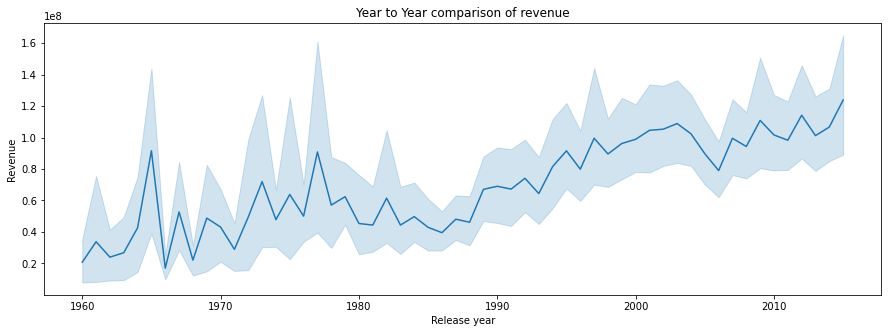

In [28]:
figure(figsize=(15, 5))

# plot
sns.lineplot(x='release_year', y='revenue', data=df);

# Add necessary labels and title
plt.title('Year to Year comparison of revenue');
plt.xlabel('Release year');
plt.ylabel('Revenue');

plt.show();

**Findings**
> The general trend of the line plot is up. Revenue gotten from movies has gone up gradually as years have gone by. This is likely because the number of movies produced each year has gone up by quite a lot.

## 4. Which genre attracts more revenue

In [29]:
# Number of movies per genre
df_genre_count = df_genre['genres'].value_counts()

df_genre_count

Drama              2272
Comedy             1771
Thriller           1422
Action             1259
Romance             877
Adventure           843
Crime               772
Science Fiction     586
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               186
History             152
War                 136
Documentary         102
Western              65
Foreign              31
TV Movie              1
Name: genres, dtype: int64

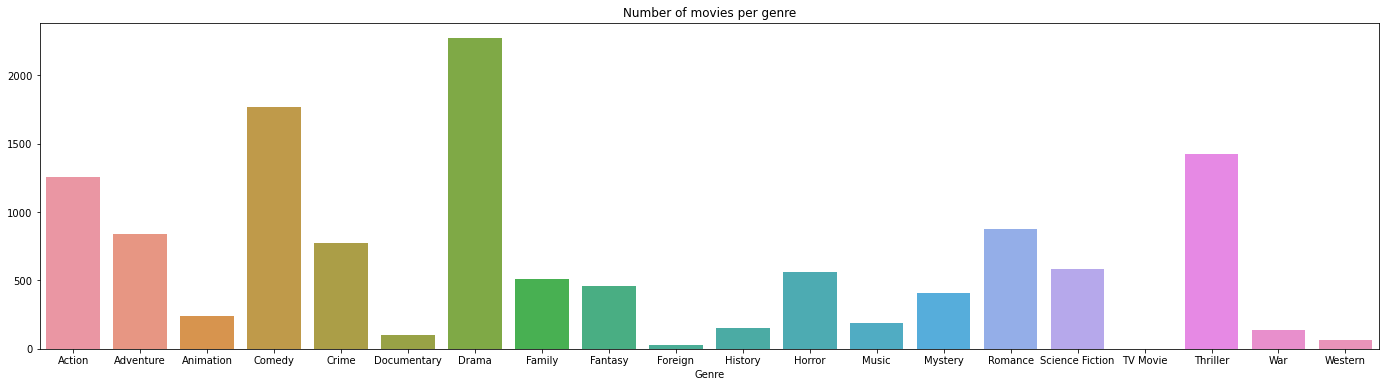

In [61]:
figure(figsize=(24, 6))

# Show the number of movies for each genre in the dataset. Sort xticks alphabetically
sns.countplot(x='genres', data=df_genre, order=df_genre_count.sort_index().index);

# labels and title.
plt.title('Number of movies per genre')
plt.xlabel('Genre')
plt.ylabel('')
plt.xticks(rotation=0);

> Drama is the genre that populates the dataset the most

In [31]:
# Group dataset by genre and calculate the sum for each genre.

df_genre.groupby('genres').sum()['revenue'].sort_values(ascending=False)

genres
Action             173417641094
Adventure          166425793633
Comedy             142337036180
Drama              139019665976
Thriller           121303638521
Family              89165240116
Fantasy             88223309887
Science Fiction     86202745824
Romance             61104656624
Crime               57366296589
Animation           52603987494
Mystery             32576228996
Horror              27538937718
War                 12728399491
Music               11657281626
History             10691067655
Western              4713837032
Documentary          1061375637
Foreign               285846449
TV Movie               42000000
Name: revenue, dtype: int64

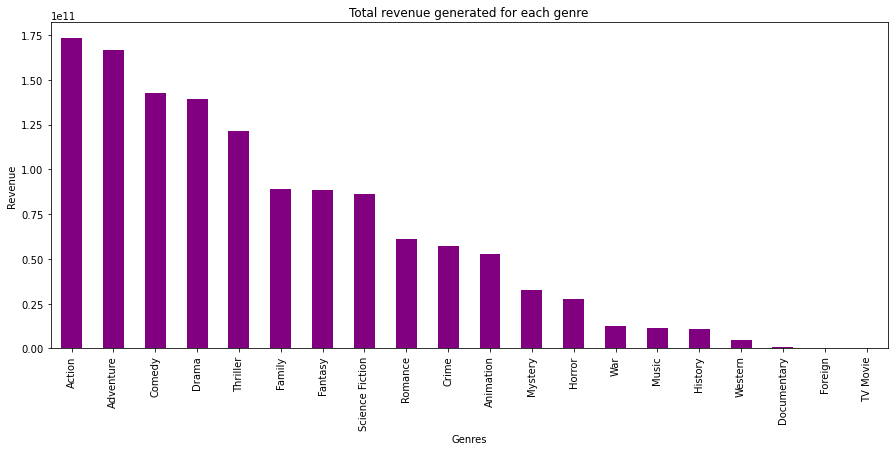

In [65]:
figure(figsize=(15, 6))

# Plot the result.
df_genre.groupby('genres').sum()['revenue'].sort_values(ascending=False).plot(kind='bar', color='purple');

# labels
plt.title('Total revenue generated for each genre');
plt.ylabel('Revenue');
plt.xlabel('Genres');

**Observations**
> This plot shows the total revenue generated for each genre, but this is dependent on the number of movies per genre. Although this does not mean that the genre with more movies would have the highest total revenue, it is not a really good way to determine which genre attracts more revenue. An alternative would be to find the average revenue generated per genre.

**Findings**
> Action genre is top for total revenue generated, closely followed by Adventure genre.

In [33]:
# Group dataset by genre and calculate the average for each genre.
df_genre_average = df_genre.groupby('genres').mean()['revenue'].sort_values(ascending=False)

df_genre_average

genres
Animation          2.219578e+08
Adventure          1.974209e+08
Fantasy            1.913738e+08
Family             1.738114e+08
Science Fiction    1.471037e+08
Action             1.377424e+08
War                9.359117e+07
Thriller           8.530495e+07
Comedy             8.037100e+07
Mystery            7.945422e+07
Crime              7.430867e+07
Western            7.252057e+07
History            7.033597e+07
Romance            6.967464e+07
Music              6.267356e+07
Drama              6.118823e+07
Horror             4.908902e+07
TV Movie           4.200000e+07
Documentary        1.040564e+07
Foreign            9.220853e+06
Name: revenue, dtype: float64

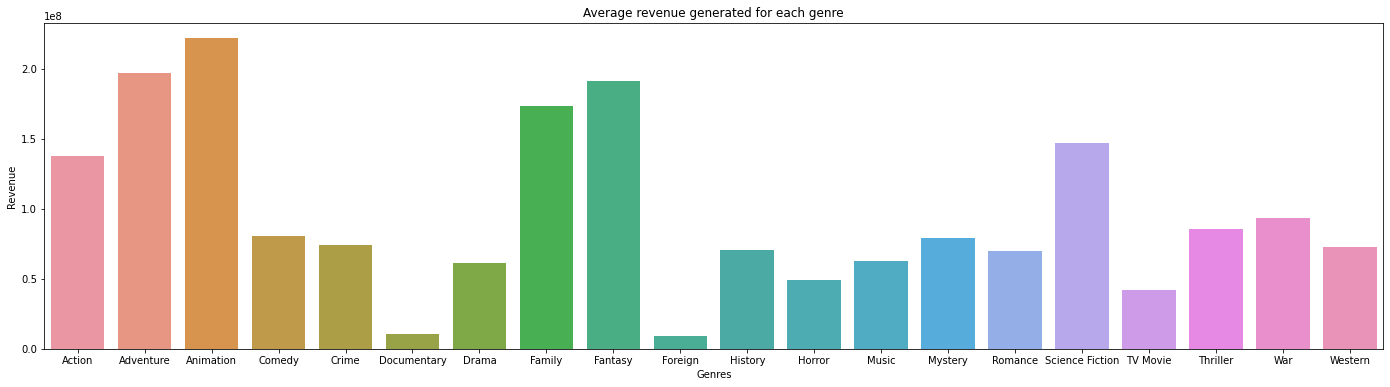

In [63]:
figure(figsize=(24, 6))

# Plot the result. Sort xticks alphabetically
sns.barplot(x='genres', y='revenue', data=df_genre, order=df_genre_average.sort_index().index, ci=None);

# labels and title
plt.xticks(rotation=0);
plt.title('Average revenue generated for each genre');
plt.ylabel('Revenue');
plt.xlabel('Genres');

**Findings**
> Animation genre generates more revenue on average for a movie.

## 5. Impact of Movie directors on the Revenue of a movie

In [35]:
df_director['director'].nunique()

2283

Since there are so many directors to explore, let's select directors that have directed more than 15 movies.

In [36]:
# The piece of code below is to select the names of the directors that have directed more than 15 movies.
top15_director = df_director['director'].value_counts()[:11]

top15_director

Steven Spielberg     28
Clint Eastwood       26
Ridley Scott         22
Woody Allen          22
Ron Howard           18
Martin Scorsese      18
Robert Rodriguez     17
Tim Burton           17
Steven Soderbergh    17
Tony Scott           16
Joel Schumacher      16
Name: director, dtype: int64

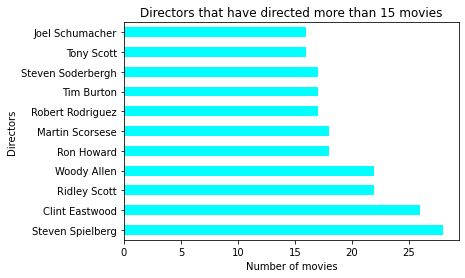

In [37]:
# Plot a horizontal bar chart to show directors that have directed more than 15 movies
top15_director.plot(kind='barh', color='cyan');

# labels
plt.title('Directors that have directed more than 15 movies');
plt.xlabel('Number of movies');
plt.ylabel('Directors');

In [38]:
# In this cell, I am filtering the main dataframe for only directors that have produced more than 15 movies
df_top15_director = df_director[ df_director['director'].isin(list(top15_director.index)) ]

df_top15_director.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
35,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,spy|cia|cold war|pilot|lawyer,141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,2015-10-15,1638,7.1,2015,3.679998e+07,1.496016e+08
68,205775,tt1390411,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,suicide|ocean|sea|hunger|shipwreck,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,2015-11-20,805,6.4,2015,9.199996e+07,8.631506e+07
141,282984,tt3715320,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015,1.012000e+07,2.519979e+07
262,190859,tt2179136,3.863074,58800000,542307423,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,Clint Eastwood,sniper|biography|iraq|navy seal|u.s. soldier,134,War|Action,Village Roadshow Pictures|Malpaso Productions|...,2014-12-11,3004,7.5,2014,5.416015e+07,4.995145e+08


Text(0, 0.5, 'Director')

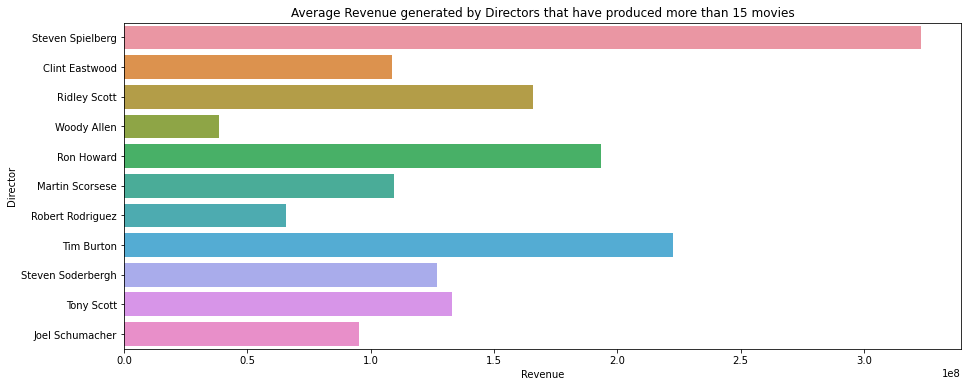

In [39]:
figure(figsize=(15, 6))

# Plot the result
sns.barplot(y='director', x='revenue', data=df_top15_director, order=top15_director.index, ci=None);

# labels and title
plt.title('Average Revenue generated by Directors that have produced more than 15 movies')
plt.xlabel('Revenue');
plt.ylabel('Director')

**Findings**
> Although the director with the highest number produced movies also has the highest mean revenue, the trend does not continue for other directors with a high number of produced movies. 
> 
> Safe to say that directors that have produced more movies do not necessarily have higher average revenue generated.

## 6. Relationship between Runtime and Revenue

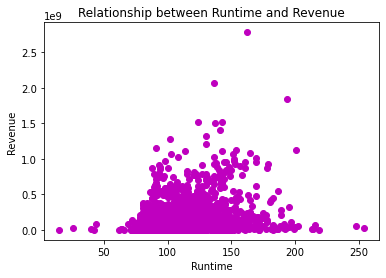

In [40]:
# plot relationship between runtime and revenue using scatterplot
plt.scatter(x=df['runtime'], y=df['revenue'], c='m');

# Add necessary labels and title
plt.xlabel('Runtime');
plt.ylabel('Revenue');
plt.title('Relationship between Runtime and Revenue');

**Observations**
> A lot of the data points are hugging the 0.0 - 0.25e9 area.

In [41]:
df[['revenue', 'runtime']].corr()

,revenue,runtime
revenue,1.000000,0.264021
runtime,0.264021,1.000000


* There is a weak correlation between runtime and revenue

## 7. Popular genres by year

Which genre/genres have a lot of movies produced yearly?

In [42]:
# create a dataframe containing the total number of movies made for each release year and genre
genre_year = df_genre.groupby(['release_year', 'genres'], as_index=False).count()

# keep only the columns we need
genre_year = genre_year[['release_year', 'genres', 'id']]
genre_year

,release_year,genres,id
0,1960,Action,2
1,1960,Adventure,1
2,1960,Comedy,4
3,1960,Drama,4
4,1960,Family,1
...,...,...,...
877,2015,Romance,25
878,2015,Science Fiction,28
879,2015,Thriller,60
880,2015,War,6


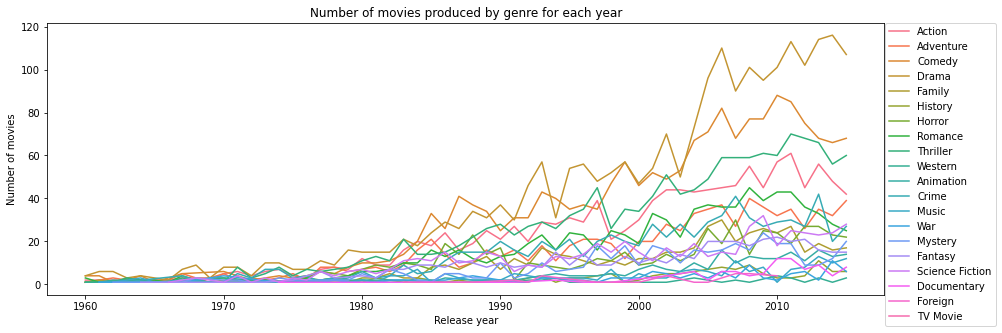

In [43]:
figure(figsize=(15, 5))

# plot the result
sns.lineplot(x='release_year', y='id', hue='genres', data=genre_year)

# place the legend outside the plot and label
plt.title('Number of movies produced by genre for each year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0)

* This is quite messy. We'll select a few of the top ones so that the important genres can be seen clearly.

In [44]:
# select the genres to be displayed on the new lineplot
genre_select = ['Comedy', 'Drama', 'History', 'Thriller', 'Adventure', 'Action', 'Animation']

# filter the other genres out
genre_year_cropped = genre_year[genre_year['genres'].isin(genre_select)]

genre_year_cropped.head(7)

,release_year,genres,id
0,1960,Action,2
1,1960,Adventure,1
2,1960,Comedy,4
3,1960,Drama,4
5,1960,History,1
8,1960,Thriller,1
10,1961,Action,2


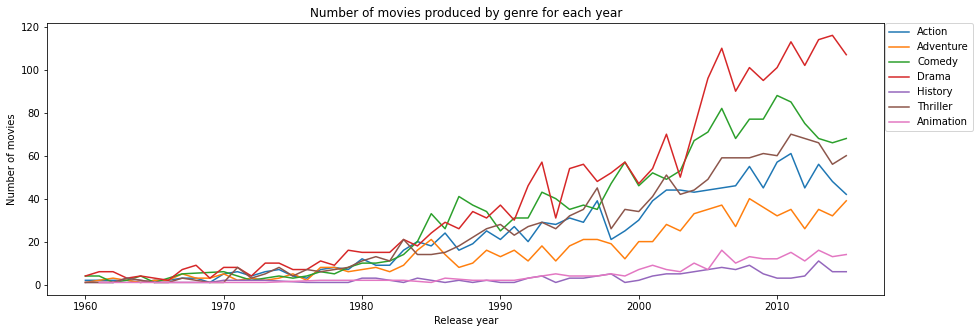

In [45]:
figure(figsize=(15, 5))

# plot the result
sns.lineplot(x='release_year', y='id', hue='genres', data=genre_year_cropped);

# place the legend outside the plot and label
plt.title('Number of movies produced by genre for each year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0);

**Findings**
> The Drama genre dominates the list by producing more movies than any other genre almost every year!

## 7.1 Average Popularity

A genre producing a lot of movies yearly does not amount to anything if the movies being produced are not watched enough by people i.e. the movies are not popular. Let's look at the average popularity rating by year for each genre.

In [46]:
# create a dataframe containing the average popularity of movies by year for each genre
genre_year_pop = df_genre.groupby(['release_year', 'genres'], as_index=False).mean()

# keep only the columns we need
genre_year_pop = genre_year_pop[['release_year', 'genres', 'popularity']]
genre_year_pop

,release_year,genres,popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.376889
3,1960,Drama,1.271213
4,1960,Family,0.114188
...,...,...,...
877,2015,Romance,1.735462
878,2015,Science Fiction,6.168163
879,2015,Thriller,3.259221
880,2015,War,1.765139


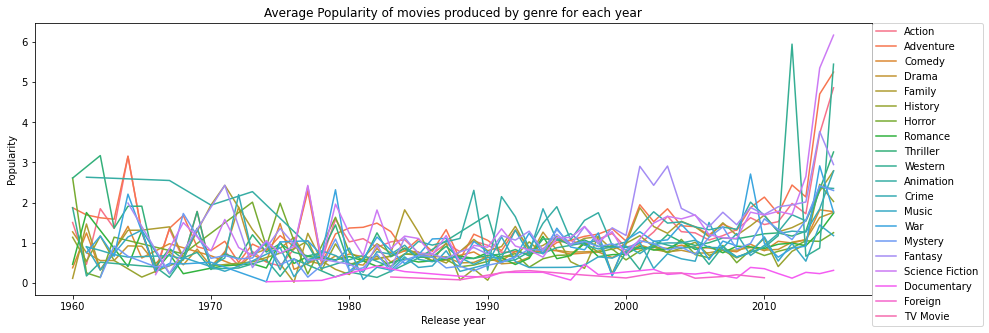

In [47]:
figure(figsize=(15, 5))

# plot the result
sns.lineplot(x='release_year', y='popularity', hue='genres', data=genre_year_pop)

# place the legend outside the plot and label
plt.title('Average Popularity of movies produced by genre for each year')
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0)

* This is even more messy. Same as the last, we'll select a few top genres to view clearly.

In [48]:
# select the genres to be displayed on the new lineplot
genre_select_pop = ['Animation', 'Fantasy', 'Science Fiction', 'Adventure', 'Horror', 'Action', 'Thriller']

# filter the other genres out
genre_select_pop_cropped = genre_year_pop[genre_year_pop['genres'].isin(genre_select_pop)]

genre_select_pop_cropped.head(7)

,release_year,genres,popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
6,1960,Horror,2.610362
8,1960,Thriller,2.610362
10,1961,Action,0.464139
11,1961,Adventure,1.693268
12,1961,Animation,2.631987


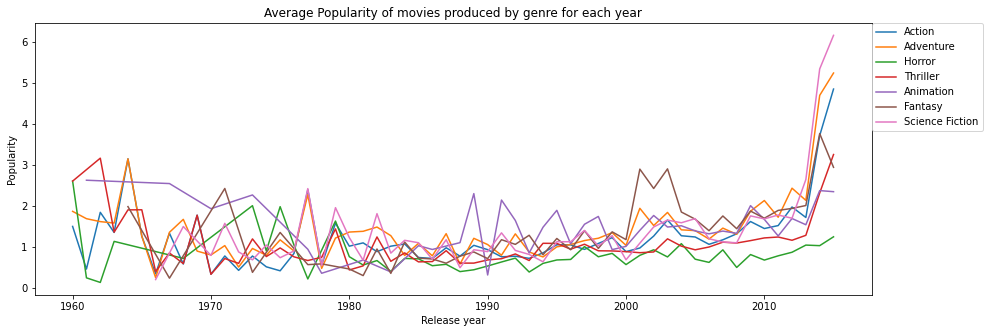

In [49]:
figure(figsize=(15, 5))

# plot the result
sns.lineplot(x='release_year', y='popularity', hue='genres', data=genre_select_pop_cropped);

# place the legend outside the plot and label
plt.title('Average Popularity of movies produced by genre for each year')
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0);

* The popularities are a little too close but it can be seen that the Animation genre was quite popular over the years. The Fantasy genre had the spotlight around 2001 - 2005.

## 8. Company's impact on Revenue

In [50]:
df_company['production_companies'].nunique()

3928

There are a lot of production companies to look at. Let's drill down on the top 15 companies in terms of total revenue generated in the dataset

In [51]:
# Create a dataframe that contains the top 15 production companies in terms of total revenue generated

# Groupby production companies and get the total revenue per company
company_rev = df_company.groupby(['production_companies']).sum()[['revenue']]

# reset index of new dataframe 
company_rev.reset_index(inplace=True)

# sort values in order of highest revenue
company_rev.sort_values(by=['revenue', 'production_companies'], ascending=False, ignore_index=True, inplace=True)

# View first few rows
company_rev.head()

,production_companies,revenue
0,Warner Bros.,54688433698
1,Universal Pictures,48134982923
2,Paramount Pictures,41348789455
3,Twentieth Century Fox Film Corporation,37828180788
4,Walt Disney Pictures,32611388637


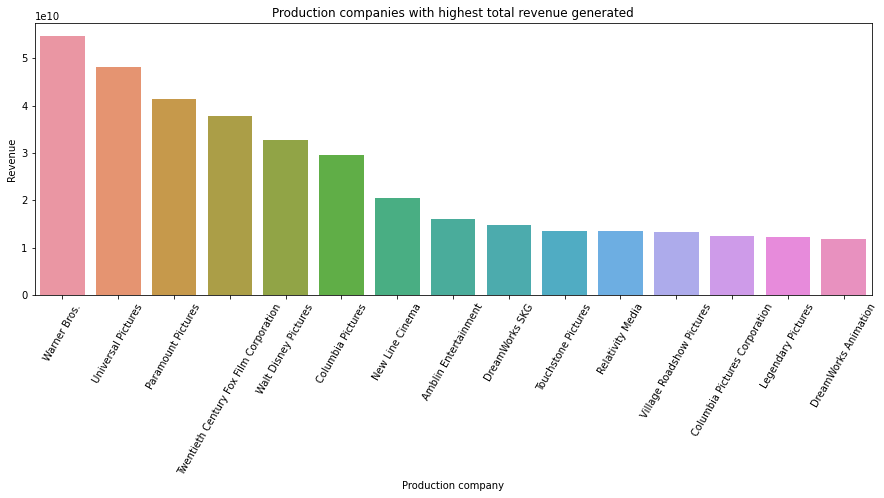

In [67]:
# Select only the top 15 companies and plot the result
company_rev = company_rev.iloc[:15, :]

figure(figsize=(15, 5))

# plot result
sns.barplot(x='production_companies', y='revenue', data=company_rev);

# labels
plt.title('Production companies with highest total revenue generated');
plt.xlabel('Production company');
plt.ylabel('Revenue');
plt.xticks(rotation=60);

**Findings**
> Warner Bros. has the most revenue generated. This might be because the company has produced a lot of movies. An alternative would be to find the average revenue generated by a company that has produced more than 90 movies.

In [53]:
# Companies that have produced more that 90 movies
company90 = df_company['production_companies'].value_counts()[:13]

company90

Universal Pictures                        386
Warner Bros.                              375
Paramount Pictures                        318
Twentieth Century Fox Film Corporation    226
Columbia Pictures                         203
New Line Cinema                           170
Touchstone Pictures                       139
Metro-Goldwyn-Mayer (MGM)                 137
Walt Disney Pictures                      132
Columbia Pictures Corporation             112
Relativity Media                          103
TriStar Pictures                           95
Miramax Films                              92
Name: production_companies, dtype: int64

In [54]:
# get the company names into a list
company90_names = list(company90.index)

company90_names

['Universal Pictures',
 'Warner Bros.',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Touchstone Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Columbia Pictures Corporation',
 'Relativity Media',
 'TriStar Pictures',
 'Miramax Films']

In [55]:
# Groupby production companies and get the total revenue per company
company_mean_rev = df_company.groupby(['production_companies']).mean()[['revenue']]

# reset index of new dataframe 
company_mean_rev.reset_index(inplace=True)

# view first few rows
company_mean_rev.head(7)

,production_companies,revenue
0,"""DIA"" Productions GmbH & Co. KG",4.435093e+07
1,1019 Entertainment,2.801508e+06
2,10th Hole Productions,1.196538e+07
3,11:11 Mediaworks,1.191883e+08
4,120dB Films,5.339245e+05
5,1492 Pictures,3.409518e+08
6,1600 Limited Partnership,2.580471e+07


In [56]:
# Filter out those that have not produced up to 90 movies
company90_mean_rev = company_mean_rev[company_mean_rev['production_companies'].isin(company90_names)]

company90_mean_rev.reset_index(drop=True, inplace=True)

company90_mean_rev

,production_companies,revenue
0,Columbia Pictures,1.458388e+08
1,Columbia Pictures Corporation,1.108712e+08
2,Metro-Goldwyn-Mayer (MGM),8.475384e+07
3,Miramax Films,5.446555e+07
4,New Line Cinema,1.204825e+08
5,Paramount Pictures,1.300276e+08
6,Relativity Media,1.301365e+08
7,Touchstone Pictures,9.754164e+07
8,TriStar Pictures,7.710466e+07
9,Twentieth Century Fox Film Corporation,1.673813e+08


Text(0, 0.5, 'Revenue')

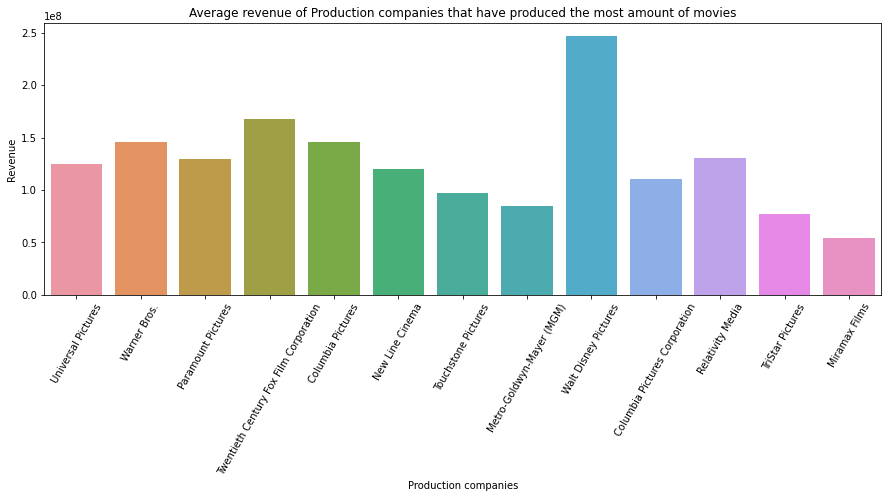

In [57]:
# Finally, plot the result
figure(figsize=(15, 5))

sns.barplot(x='production_companies', y='revenue', data=company90_mean_rev, order=company90_names)

# labels
plt.xticks(rotation=60)
plt.title('Average revenue of Production companies that have produced the most amount of movies')
plt.xlabel('Production companies')
plt.ylabel('Revenue')

**Observations and Findings**
> Walt Disney Pictures generated the highest average revenue per movie by a mile even though there are several other production companies with hundreds more movies produced.

> This result can further be confirmed by the fact that Animation genre generates more revenue on average per movie.

## 9. Relationship between vote count and revenue

Text(0, 0.5, 'Revenue')

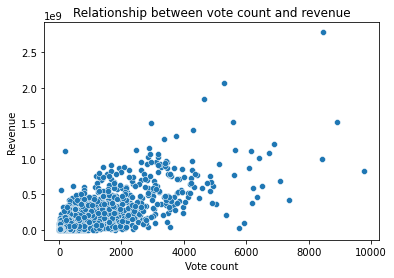

In [58]:
# Show relationship on a scatterplot
sns.scatterplot(x=df['vote_count'], y=df['revenue'])

# labels and title
plt.title('Relationship between vote count and revenue')
plt.xlabel('Vote count')
plt.ylabel('Revenue')

**Findings**
> As clearly seen, there is a positive correlation between vote count and revenue.

In [59]:
df[['vote_count', 'revenue']].corr()

,vote_count,revenue
vote_count,1.000000,0.764112
revenue,0.764112,1.000000


* Vote count has a strong positive correlation of 0.76 with Revenue

<a id='conclusions'></a>
## Conclusions


Analysis of the imdb movies dataset produced a lot of interesting insights. The insights that were garnered are listed below;

> 1. Budget has a positive correlation coefficient of **0.69** with Revenue.
>
> 2. Popularity also has a positive correlation coefficient of **0.63** with Revenue.
>
> 3. Total revenue gotten from movies has gone up over the years.
>
> 4. Animation genre attracts more revenue per movie on average, with an average of approximately **222 million dollars** per movie. Action genre has the highest total revenue generated (approx **173.4 billion dollars** in revenue).
>
> 5. Directors do not necessarily impact revenue. The fact that a director has directed more movies does not guarantee that they will generate more revenue than a director with a smaller number of movies directed.
>
> 6. The runtime of a movie has a weak positive correlation of **0.26** with the revenue.
>
> 7. The Drama genre produces more movies yearly than any other genre. Average popularity among genres is really close between Animation, Adventure and Science Fiction year to year.
>
> 8. Walt Disney Pictures has the highest average revenue generated among production companies. With an average revenue of **247 million dollars**, the next best company (Twentieth Century Fox Film Corporation) averages **167 million dollars** in revenue.
>
> 9. There is a strong positive correlation of **0.76** between vote count and Revenue.

### Limitations

* Correlation does not imply causation. This analysis merely tests the correlation between two variables and does not imply that one variable causes change in the other. Several other statistical methods and tests have to be run before one can come to a conclusion of causation.
* Missing values in the revenue columns can be researched and filled in to make a more complete dataset.
* The cast column contained very weird strings that made exploring it a bit difficult.
* This dataset is a sample of all the movies ever produced. Some insights may change if this analysis were done with another sample of the population dataset.